In [1]:
library(data.table)
library(ggplot2)

In [2]:
filtered_vafs <- fread("/illumina/scratch/deep_learning/asalcedo/scATAC/scATAC_vafs/TCGA_bulk_AI_variants.txt")

In [3]:
sample_key <- fread("/illumina/scratch/deep_learning/asalcedo/scATAC/atac_tcga_key.txt")

In [4]:
sample_key <- fread("/illumina/scratch/deep_learning/asalcedo/scATAC/190101_Samples_For_scATAC.csv")

In [6]:
head(filtered_vafs)

idx,acronym,case_id,region,ref,alt,atac_vaf,atac_dp,chrom,pos,⋯,wgs_vaf,ref_count,alt_count,total_count,gender,vaf_difference,diff_summit_centered,diff_mutation_centered,lof_summit_centered,gof_mutation_centered
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>,⋯,<dbl>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>
chr10_100186039_C_T,BRCA,TCGA-BH-A0HP,chr10:100186039-100186039,C,T,0.0000000,151,chr10,100186039,⋯,0.09917355,109,12,121,FEMALE,-0.09917355,0.032485664,0.051526308,0,0
chr10_100186243_G_C,BRCA,TCGA-C8-A12T,chr10:100186243-100186243,G,C,0.0000000,218,chr10,100186243,⋯,0.14166667,103,17,120,FEMALE,-0.14166667,-0.003796756,-0.003147066,0,0
chr10_100229245_C_A,BLCA,TCGA-BL-A13J,chr10:100229245-100229245,C,A,0.3442623,61,chr10,100229245,⋯,0.26086957,51,18,69,MALE,0.08339273,-0.002357304,0.004987359,0,0
chr10_100229638_C_G,BLCA,TCGA-BL-A13J,chr10:100229638-100229638,C,G,0.3271028,107,chr10,100229638,⋯,0.16867470,69,14,83,MALE,0.15842810,0.146393000,0.117428064,1,0
chr10_100267579_C_A,LUAD,TCGA-73-A9RS,chr10:100267579-100267579,C,A,0.5000000,52,chr10,100267579,⋯,0.35227273,57,31,88,MALE,0.14772727,0.010443866,0.021115422,0,0
chr10_100267656_G_A,BRCA,TCGA-AO-A0JG,chr10:100267656-100267656,G,A,0.4933333,75,chr10,100267656,⋯,0.29245283,75,31,106,FEMALE,0.20088050,0.016299367,0.029590249,0,0


In [4]:
colnames(sample_key)

[1] "#"                        "TCGA-BOX-ID"             
 [3] "ROW"                      "COLUMN"                  
 [5] "Biospecimen Barcode Side" "Batch #"                 
 [7] "Disease Abbreviation"     "Tissue Type"             
 [9] "Histology"                "Case_UUID"               
[11] "stanfordUUID"             "Chang-Box-ID"            
[13] "Batch"                    "SampleID"                
[15] "UUID_SampleName Prefix"   "Remaining Nuclei Frozen" 
[17] "QC Pass/Fail"             "FractionMito"            
[19] "TSSscore"                 "ESTIMATE_TumorPurity"    
[21] "ABSOLUTE_TumorPurity"     "LUMP_TumorPurity"        
[23] "IHC_TumorPurity"          "CPE_TumorPurity"         
[25] "methLeukFraction"         "BRCA_ConsensusCall?"     
[27] "For scATAC?"              "scATAC Batch"            
[29] "HiChIP_Performed"         "has_WGS"                 
[31] "has_WXS"                  "has_GenotypingArray"     
[33] "has_MethylationArray"     "has_Meth450K"            
[35] "has_Meth27K"              "has_miRNA-Seq"           
[37] "has_RNA-Seq"              "cohort"                  
[39] "state"                    "submitter_id"            
[41] "updated_datetime"         "KH_PAM50"                
[43] "KH_Confidence"            "BRCA_scmod2"             
[45] "BRCA_pam50"               "BRCA_ic10"               
[47] "BRCA_ic11"                "TCGA_ID"                 
[49] "CNV_MYC"                  "CNV_TERC"                
[51] "CNV_CCND1"                "CNV_EGFR"                
[53] "CNV_MDM2"                 "CNV_ERBB2"               
[55] "CNV_CCNE1"                "CNV_ARID1A"              
[57] "CNV_TP53"                 "CNV_CDKN2B"              
[59] "CNV_CDKN2A"               "ARID1A_WXS"              
[61] "ARID1A_WXS_highSum"       "ARID1A_WXS_lowSum"       
[63] "V63"

In [7]:
sample_key$in_scATAC <- sapply(sample_key[,'For scATAC?'][[1]], function(x) grepl("yes", tolower(x)))

In [7]:
table(sample_key$in_scATAC)


FALSE  TRUE 
  352    72 

In [11]:
filtered_vafs[,in_scATAC:=(case_id %in% sample_key[in_scATAC == TRUE,]$submitter_id)]

In [12]:
filtered_vafs[in_scATAC==TRUE,vaf_difference:=NA]

In [13]:
head(filtered_vafs)

idx,acronym,case_id,region,ref,alt,atac_vaf,atac_dp,chrom,pos,⋯,ref_count,alt_count,total_count,gender,vaf_difference,diff_summit_centered,diff_mutation_centered,lof_summit_centered,gof_mutation_centered,in_scATAC
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<lgl>
chr10_100186039_C_T,BRCA,TCGA-BH-A0HP,chr10:100186039-100186039,C,T,0.0000000,151,chr10,100186039,⋯,109,12,121,FEMALE,-0.09917355,0.032485664,0.051526308,0,0,FALSE
chr10_100186243_G_C,BRCA,TCGA-C8-A12T,chr10:100186243-100186243,G,C,0.0000000,218,chr10,100186243,⋯,103,17,120,FEMALE,-0.14166667,-0.003796756,-0.003147066,0,0,FALSE
chr10_100229245_C_A,BLCA,TCGA-BL-A13J,chr10:100229245-100229245,C,A,0.3442623,61,chr10,100229245,⋯,51,18,69,MALE,NA,-0.002357304,0.004987359,0,0,TRUE
chr10_100229638_C_G,BLCA,TCGA-BL-A13J,chr10:100229638-100229638,C,G,0.3271028,107,chr10,100229638,⋯,69,14,83,MALE,NA,0.146393000,0.117428064,1,0,TRUE
chr10_100267579_C_A,LUAD,TCGA-73-A9RS,chr10:100267579-100267579,C,A,0.5000000,52,chr10,100267579,⋯,57,31,88,MALE,NA,0.010443866,0.021115422,0,0,TRUE
chr10_100267656_G_A,BRCA,TCGA-AO-A0JG,chr10:100267656-100267656,G,A,0.4933333,75,chr10,100267656,⋯,75,31,106,FEMALE,0.20088050,0.016299367,0.029590249,0,0,FALSE


lof_summit_centered,N
<int>,<int>
0,5248
1,114


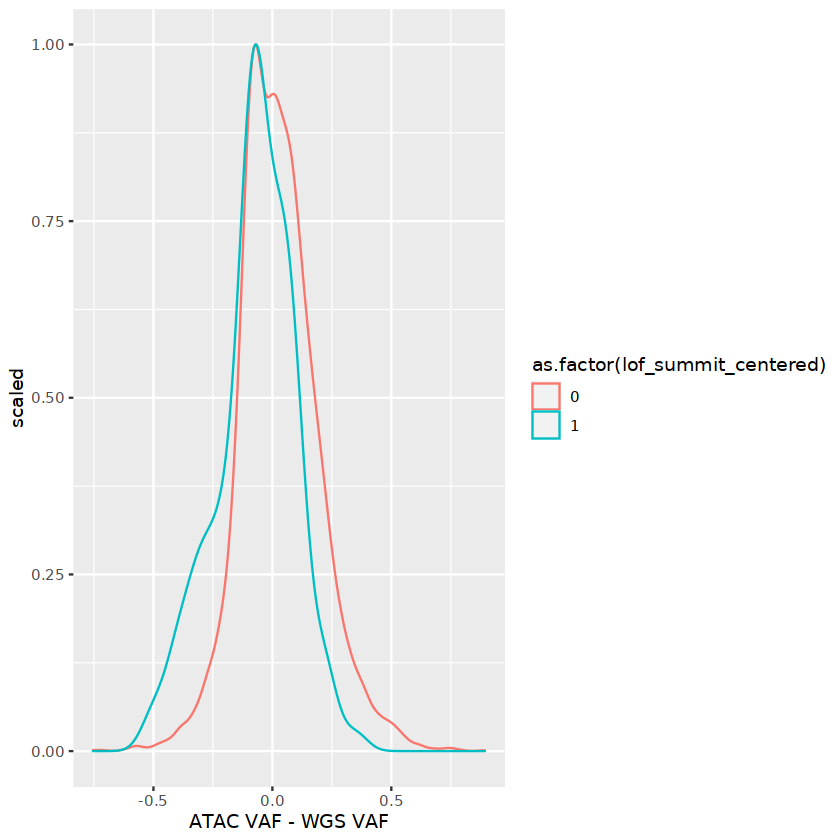

In [8]:
filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE,]$submitter_id),][,.N, by=lof_summit_centered]
ggplot(filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE,]$submitter_id),], aes(x=vaf_difference, color=as.factor(lof_summit_centered))) + geom_density(aes(y=..scaled..), alpha=.1) + xlab("ATAC VAF - WGS VAF")

In [11]:
t.test(filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE,]$submitter_id),][lof_summit_centered == 1,]$vaf_difference, filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE,]$submitter_id),][lof_summit_centered == 0,]$vaf_difference)
wilcox.test(filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE,]$submitter_id),][lof_summit_centered == 1,]$vaf_difference, filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE,]$submitter_id),][lof_summit_centered == 0,]$vaf_difference)


	Welch Two Sample t-test

data:  filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE, ]$submitter_id), ][lof_summit_centered == 1, ]$vaf_difference and filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE, ]$submitter_id), ][lof_summit_centered == 0, ]$vaf_difference
t = -6.513, df = 118.07, p-value = 1.882e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.13136688 -0.07010908
sample estimates:
  mean of x   mean of y 
-0.07251974  0.02821824 



	Wilcoxon rank sum test with continuity correction

data:  filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE, ]$submitter_id), ][lof_summit_centered == 1, ]$vaf_difference and filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE, ]$submitter_id), ][lof_summit_centered == 0, ]$vaf_difference
W = 205745, p-value = 1.121e-08
alternative hypothesis: true location shift is not equal to 0


gof_mutation_centered,N
<int>,<int>
0,5284
1,78


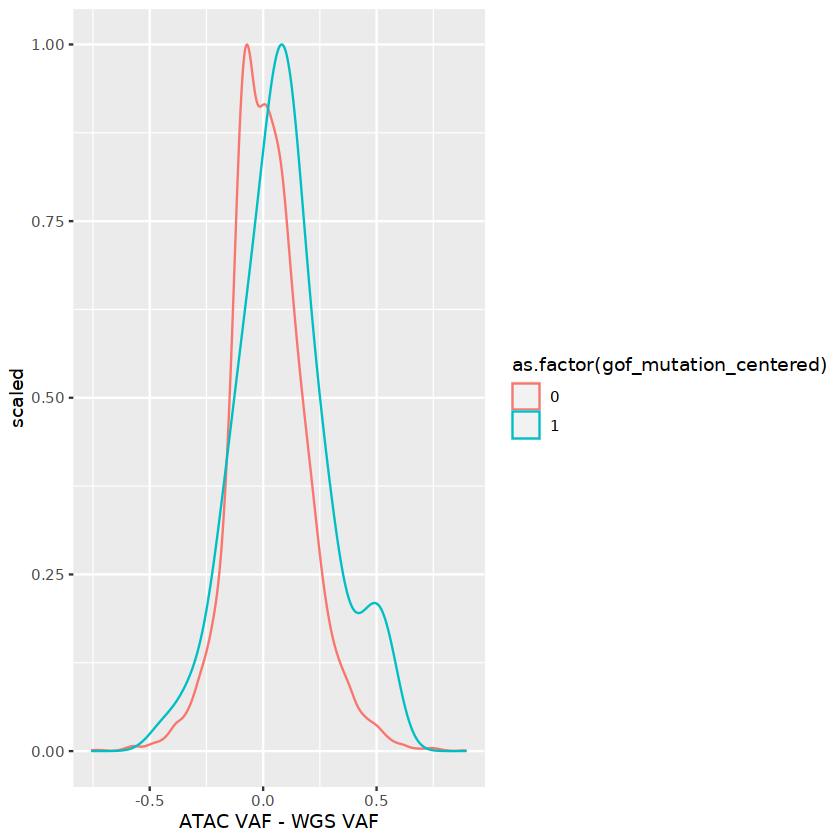

In [12]:
filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE,]$submitter_id),][,.N, by=gof_mutation_centered]
ggplot(filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE,]$submitter_id),], aes(x=vaf_difference, color=as.factor(gof_mutation_centered))) + geom_density(aes(y=..scaled..), alpha=.1) + xlab("ATAC VAF - WGS VAF")

In [13]:
t.test(filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE,]$submitter_id),][gof_mutation_centered == 1,]$vaf_difference, filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE,]$submitter_id),][gof_mutation_centered == 0,]$vaf_difference)
wilcox.test(filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE,]$submitter_id),][gof_mutation_centered == 1,]$vaf_difference, filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE,]$submitter_id),][gof_mutation_centered == 0,]$vaf_difference)


	Welch Two Sample t-test

data:  filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE, ]$submitter_id), ][gof_mutation_centered == 1, ]$vaf_difference and filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE, ]$submitter_id), ][gof_mutation_centered == 0, ]$vaf_difference
t = 2.7138, df = 78.493, p-value = 0.008173
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.01678413 0.10918629
sample estimates:
 mean of x  mean of y 
0.08814545 0.02516025 



	Wilcoxon rank sum test with continuity correction

data:  filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE, ]$submitter_id), ][gof_mutation_centered == 1, ]$vaf_difference and filtered_vafs[!(case_id %in% sample_key[in_scATAC == TRUE, ]$submitter_id), ][gof_mutation_centered == 0, ]$vaf_difference
W = 246937, p-value = 0.002607
alternative hypothesis: true location shift is not equal to 0


In [14]:
scATAC_vafs <- fread("/illumina/scratch/deep_learning/asalcedo/scATAC/scATAC_vafs/TCGA_scATAC_AI_variants.txt")

In [16]:
head(filtered_vafs, 3)

idx,acronym,case_id,region,ref,alt,atac_vaf,atac_dp,chrom,pos,⋯,ref_count,alt_count,total_count,gender,vaf_difference,diff_summit_centered,diff_mutation_centered,lof_summit_centered,gof_mutation_centered,in_scATAC
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<lgl>
chr10_100186039_C_T,BRCA,TCGA-BH-A0HP,chr10:100186039-100186039,C,T,0.0000000,151,chr10,100186039,⋯,109,12,121,FEMALE,-0.09917355,0.032485664,0.051526308,0,0,FALSE
chr10_100186243_G_C,BRCA,TCGA-C8-A12T,chr10:100186243-100186243,G,C,0.0000000,218,chr10,100186243,⋯,103,17,120,FEMALE,-0.14166667,-0.003796756,-0.003147066,0,0,FALSE
chr10_100229245_C_A,BLCA,TCGA-BL-A13J,chr10:100229245-100229245,C,A,0.3442623,61,chr10,100229245,⋯,51,18,69,MALE,NA,-0.002357304,0.004987359,0,0,TRUE


In [17]:
head(scATAC_vafs,3)

idx,acronym,case_id,region,ref,alt,atac_vaf,atac_dp,chrom,pos,⋯,ref_count,alt_count,total_count,gender,vaf_difference,diff_summit_centered,diff_mutation_centered,lof_summit_centered,gof_mutation_centered,chrX
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<lgl>
chr10_100228872_T_C,COAD,TCGA-NH-A5IV,chr10:100228872-100228872,T,C,0.0000000,44,chr10,100228872,⋯,70,12,82,FEMALE,-0.14634146,-0.001738071,-0.024743557,0,0,FALSE
chr10_100228914_C_G,BLCA,TCGA-BL-A13J,chr10:100228914-100228914,C,G,0.2696629,89,chr10,100228914,⋯,60,10,70,MALE,0.12680578,0.000333190,-0.006130636,0,0,FALSE
chr10_100229245_C_A,BLCA,TCGA-BL-A13J,chr10:100229245-100229245,C,A,0.3030303,99,chr10,100229245,⋯,51,18,69,MALE,0.04216074,-0.002357304,0.004987359,0,0,FALSE


In [79]:
merged_vafs <- merge(filtered_vafs, scATAC_vafs[,.(idx, chrom, pos, ref, alt, case_id, atac_vaf, atac_dp, total_count, wgs_vaf, vaf_difference, diff_summit_centered, diff_mutation_centered, lof_summit_centered, gof_mutation_centered )], by=c("idx", "chrom", "pos", "ref", "alt", "case_id"), all=TRUE)

In [70]:
all(merged_vafs[in_scATAC==TRUE,]$wgs_vaf.x == merged_vafs[in_scATAC==TRUE,]$wgs_vaf.y, na.rm=TRUE)
all(merged_vafs[in_scATAC==TRUE,]$total_count.x == merged_vafs[in_scATAC==TRUE,]$total_count.y, na.rm=TRUE)
all(merged_vafs[in_scATAC==TRUE,]$diff_summit_centered.x == merged_vafs[in_scATAC==TRUE,]$diff_summit_centered.y, na.rm=TRUE)
all(merged_vafs[in_scATAC==TRUE,]$diff_mutation_centered.x == merged_vafs[in_scATAC==TRUE,]$diff_mutation_centered.y, na.rm=TRUE)
all(merged_vafs[in_scATAC==TRUE,]$gof_mutation_centered.x == merged_vafs[in_scATAC==TRUE,]$gof_mutation_centered.y, na.rm=TRUE)
all(merged_vafs[in_scATAC==TRUE,]$lof_mutation_centered.x == merged_vafs[in_scATAC==TRUE,]$lof_mutation_centered.y, na.rm=TRUE)

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

In [80]:
merged_vafs[,wgs_vaf:=wgs_vaf.x]
merged_vafs[is.na(wgs_vaf.x),wgs_vaf:=wgs_vaf.y]
merged_vafs[,wgs_dp:=total_count.x]
merged_vafs[is.na(total_count.x),wgs_dp:=total_count.y]
merged_vafs[,diff_summit_centered:=diff_summit_centered.x]
merged_vafs[is.na(diff_summit_centered.x),diff_summit_centered:=diff_summit_centered.y]
merged_vafs[,diff_mutation_centered:=diff_mutation_centered.x]
merged_vafs[is.na(diff_mutation_centered.x),diff_mutation_centered:=diff_mutation_centered.y]
merged_vafs[,gof_mutation_centered:=gof_mutation_centered.x]
merged_vafs[is.na(gof_mutation_centered.x),gof_mutation_centered:=gof_mutation_centered.y]
merged_vafs[,lof_summit_centered:=lof_summit_centered.x]
merged_vafs[is.na(lof_summit_centered.x),lof_summit_centered:=lof_summit_centered.y]

In [81]:
merged_vafs[,filter:=NULL]
merged_vafs[,wgs_vaf.x:=NULL]
merged_vafs[,wgs_vaf.y:=NULL]
merged_vafs[,total_count.x:=NULL]
merged_vafs[,total_count.y:=NULL]
merged_vafs[,ref_count:=NULL]
merged_vafs[,alt_count:=NULL]
merged_vafs[,diff_summit_centered.x:=NULL]
merged_vafs[,diff_summit_centered.y:=NULL]
merged_vafs[,diff_mutation_centered.x:=NULL]
merged_vafs[,diff_mutation_centered.y:=NULL]
merged_vafs[,lof_summit_centered.x:=NULL]
merged_vafs[,lof_summit_centered.y:=NULL]
merged_vafs[,gof_mutation_centered.x:=NULL]
merged_vafs[,gof_mutation_centered.y:=NULL]
merged_vafs[,region:=NULL]
merged_vafs[,acronym:=NULL]
merged_vafs[,gender:=NULL]


In [82]:
colnames(merged_vafs)

[1] "idx"                    "chrom"                  "pos"                   
 [4] "ref"                    "alt"                    "case_id"               
 [7] "atac_vaf.x"             "atac_dp.x"              "vaf_difference.x"      
[10] "in_scATAC"              "atac_vaf.y"             "atac_dp.y"             
[13] "vaf_difference.y"       "wgs_vaf"                "wgs_dp"                
[16] "diff_summit_centered"   "diff_mutation_centered" "gof_mutation_centered" 
[19] "lof_summit_centered"

In [84]:
colnames(merged_vafs)[c(7,8,9,11,12,13)] <- c("bulk_atac_vaf", "bulk_atac_dp","bulk_atac_vaf_difference","scATAC_vaf","scATAC_dp","scATAC_vaf_difference")

In [86]:
data.table(colnames(merged_vafs), c(1:ncol(merged_vafs)))

V1,V2
<chr>,<int>
idx,1
chrom,2
pos,3
ref,4
alt,5
case_id,6
bulk_atac_vaf,7
bulk_atac_dp,8
bulk_atac_vaf_difference,9


In [87]:
out_df <- cbind(merged_vafs[,c(1:6)],merged_vafs[,c(10,14,15)], merged_vafs[,c(7:9)], merged_vafs[,c(11:13)], merged_vafs[,c(16:19)])

In [89]:
out_df[is.na(in_scATAC) & (case_id %in% scATAC_vafs$case_id), in_scATAC:=TRUE]

In [92]:
head(out_df[,10:19])

bulk_atac_vaf,bulk_atac_dp,bulk_atac_vaf_difference,scATAC_vaf,scATAC_dp,scATAC_vaf_difference,diff_summit_centered,diff_mutation_centered,gof_mutation_centered,lof_summit_centered
<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.0000000,151,-0.09917355,NA,NA,NA,0.032485664,0.051526308,0,0
0.0000000,218,-0.14166667,NA,NA,NA,-0.003796756,-0.003147066,0,0
NA,NA,NA,0.0000000,44,-0.14634146,-0.001738071,-0.024743557,0,0
NA,NA,NA,0.2696629,89,0.12680578,0.000333190,-0.006130636,0,0
0.3442623,61,NA,0.3030303,99,0.04216074,-0.002357304,0.004987359,0,0
0.3271028,107,NA,0.3096234,239,0.14094873,0.146393000,0.117428064,0,1


In [94]:
write.table(out_df, file="/illumina/scratch/deep_learning/asalcedo/scATAC/tables/allelic_imbalance.txt", quote=FALSE, row.names = FALSE, sep="\t")